# Materi 3 : Studi Kasus Two-Way ANOVA + Analisis Interaksi

### 3.1. Studi Kasus
Eksperimen dilakukan untuk mengamati jumlah gol yang dicetak oleh Timnas Indonesia berdasarkan dua faktor :
- Jenis Latihan : `Fisik` atau `Taktikal`
- Tipe Pelatih : `Lokal`, `Asing`, atau `Asisten`

**Tujuan** : Mengetahui apakah **jenis latihan**, **tipe pelatih**, atau **interaksinya** berpengaruh terhadap jumlah gol.

- H₀ : Tidak ada pengaruh antara latihan, pelatih, maupun interaksi terhadap jumlah gol.
- H₁ : Setidaknya salah satu faktor atau interaksi memiliki pengaruh signifikan.

### 3.2. Struktur Data
[dataset.csv](/model/two_way/dataset.csv) terdiri dari :
- `Latihan` : Jenis latihan (Fisik atau Taktikal)
- `Pelatih` : Tipe pelatih (Lokal, Asing, Asisten)
- `Gol` : Jumlah gol dalam sesi uji coba

### 3.3. Module & Library

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

### 3.4. Membaca Dataset dari File CSV

In [5]:
df = pd.read_csv('dataset.csv')
df.head()

,Latihan,Pelatih,Gol
0,Fisik,Lokal,2.2
1,Fisik,Lokal,1.9
2,Fisik,Lokal,0.7
3,Fisik,Lokal,1.5
4,Fisik,Lokal,1.8


### 3.5. Visualisasi Awal

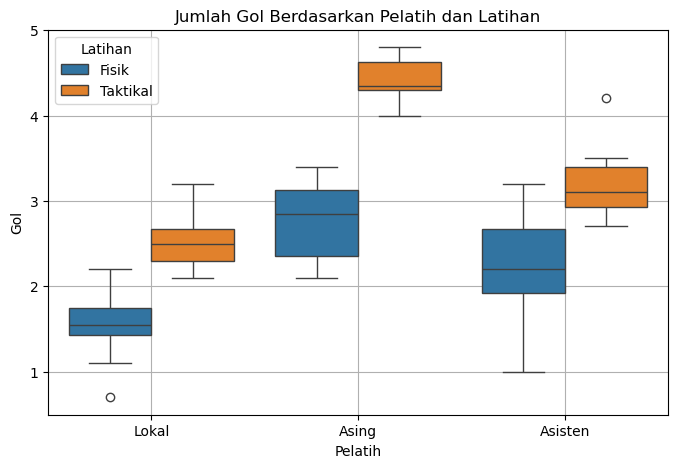

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pelatih', y='Gol', hue='Latihan', data=df)
plt.title('Jumlah Gol Berdasarkan Pelatih dan Latihan')
plt.grid(True)
plt.show()

### 3.6. Analisis Two-Way ANOVA

In [7]:
model = ols('Gol ~ C(Latihan) + C(Pelatih) + C(Latihan):C(Pelatih)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print("Hasil ANOVA Dua Arah")
print(anova_table)

Hasil ANOVA Dua Arah
                        sum_sq    df           F        PR(>F)
C(Latihan)             22.6935   1.0  104.195987  3.287194e-14
C(Pelatih)             24.3970   2.0   56.008758  6.768243e-14
C(Latihan):C(Pelatih)   1.2010   2.0    2.757164  7.241863e-02
Residual               11.7610  54.0         NaN           NaN


### 3.7. Interpretasi Output
- **Efek utama latihan** : Apakah jenis latihan (Fisik atau Taktikal) memengaruhi gol?
- **Efek utama pelatih** : Apakah tipe pelatih berpengaruh?
- **Interaksi** : Apakah kombinasi tertentu antara pelatih dan latihan menciptakan efek tambahan?

Jika p-value < 0.05 → pengaruhnya signifikan.

### 3.8. Visualisasi Interaksi

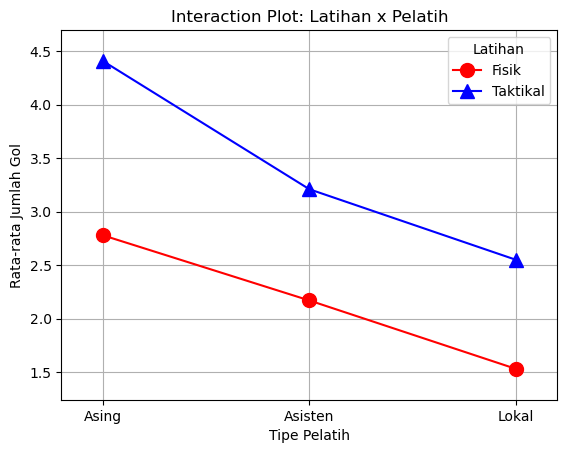

In [8]:
fig = interaction_plot(df['Pelatih'], df['Latihan'], df['Gol'],
                       colors=['red', 'blue'], markers=['o', '^'], ms=10)
plt.title('Interaction Plot: Latihan x Pelatih')
plt.xlabel('Tipe Pelatih')
plt.ylabel('Rata-rata Jumlah Gol')
plt.grid(True)
plt.show()

### 3.9. Kesimpulan
- Analisis Two-Way ANOVA membantu kita memahami **pengaruh independen dan interaksi** antara dua faktor.
- Jika interaksi signifikan, artinya kombinasi tertentu (misal: pelatih asing + latihan taktik) memberikan dampak lebih besar dari efek masing-masing faktor secara terpisah.
- Ini penting dalam membuat keputusan pelatihan tim nasional.